## Install

In [1]:
# Install wordcloud (linux)
# conda install -c amueller wordcloud=1.3.1

# OR
# sudo pip3.4 install wordcloud

# Install wordcloud (Windows)
# Download from : http://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud
# pip install wordcloud‑1.3.1‑cp35‑cp35m‑win_amd64.whl

## Import

In [2]:
# Import
import glob
import timeit
import re
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline 

## Word Cleaning

In [3]:
def word_counter_handle(string_of_text):
    """
    Converts a string to a dictionary of words.   
    """
    # Empty dictionary
    dictionary_of_words ={}
    
    # Regex to process each word
    regex = re.compile("[%()^$0-9,'\.;:!?{}]")
    
    # loop over a string split by whitespace
    for word in string_of_text.split(' '):
    
        # implement regex from above for each word
        m = regex.sub('', word)
        
        # drop spaces and single letters 
        if len(m) > 1:
            
            # note the use of lower case | add words to dictionary
            dictionary_of_words[m.lower()] = dictionary_of_words.get(m.lower(), 0) + 1
            
    # Return the results
    return dictionary_of_words

## Doc finder

In [4]:
def doc_finder_handle(basepath, fileformat):
    """
    Finds files of a particular format in the basepath.
    """
    # place holder
    docs = []

    # Loop over files
    for each_file in glob.glob(basepath + '/*.' + fileformat):
        docs.append(each_file)

    # return docs
    return docs

In [5]:
docs = doc_finder_handle('data', 'txt')
print(docs) 

['data/more_citations.txt', 'data/citations.txt']


## Text File Splitter

Bibtex citation exports are compiled in a single txt document. A procedure is required to split the document into pieces before processing.

In [6]:
# loop and split
def bibtex_splitter(file):
    """
    Summary
    --------
    Helper function to splitter text document into citation articles and process hard coded parameters. 
    The input txt file needs to be a set of citations downloaded in Bibtex format. There are specific 
    patterns that are looked for to split the text document such as the @article value to separate the 
    primary content. Returns a list of dictionaries containing all of the keywords defined in this method.
    
    Parameters
    -----------
    arg1: txt file 
    
    Usage
    -----
    text = open('data/more_citations.txt', 'r') 
    bibtex_splitter(text)
    
    Example data
    -------------
    
    
    Returns
    ---------
    
    """
    # Placeholder
    textcapture = []
    
    # List of items to collect
    items = ['ISSN =', 'abstract =', 'author =', 'journal =', 'number =', 
         'pages =', 'publisher=', 'title=', 'volume=', 'year=']
    
    # Loop over the file (txt file)
    for doc in file.read().split('@'):
        temp = {}
        for item in items:
            m = re.search(item, doc)
            try:
                item_end = doc[m.end(): ] 
                capture = item_end[item_end.find('{') + 1 : item_end.find('}')]
                temp[item[:-2]] = capture
                
            except:
                pass
        
        # Add list
        textcapture.append(temp)        
        
    return textcapture

In [7]:
# open file
text = open('data/more_citations.txt', 'r') 

# implement method
ts = bibtex_splitter(text)

## Review / Checks

In [8]:
print(ts[3]['author'])
print(ts[4]['author'])

S. J. Ormerod and M. W. Pienkowski and A. R. Watkinson
Lonnie W. Aarssen


## Word stemming

In [9]:
stemmer = SnowballStemmer("english")

## Process text

In [10]:
def bibtex_process(docs):
    
    # Placeholder for output
    stemmed_journal_words = {}
    original_journal_words = {}

    # Set counting variables (used below)    
    number_of_docs = len(docs)   

    # add timer
    tic = timeit.default_timer()
    word_counter = 0
    document_counter = 0
    
    # loop over docs
    for each_file in docs:
        
        # add one to the document counter to show progress
        document_counter += 1

        # provide running countdown in console
        print('working on... %s (%s/%s)' %(each_file, document_counter, number_of_docs))

        # open text file
        text = open(each_file, 'r') 
        
        # split text
        ts = bibtex_splitter(text)

        # read in each line
        for i in ts:

            # skip if no data
            if i == {}:
                continue

            # proceed if data is available    
            else:
                # ----------- Process Fields ---------------
                #
                # ----------- Process Abstracts ------------------
                # Try to find all the lines starting with abstract
                try:
                    # Convert string to words dictionary
                    output_text = word_counter_handle(i['abstract'])
                    
                    # pull key-value pairs from dictionary and parse out stopwords
                    for key, value in output_text.items():

                        # pass on all stop words
                        if re.search(r'\\', key) or key in STOPWORDS:
                            pass

                        else:    
                            # need to use stem package to remove plurals
                            try: 
                                key_stem = stemmer.stemWord(key)
                                stemmed_journal_words[key_stem] = stemmed_journal_words.get(
                                    key_stem.lower(), 0) + value
                                
                            except:
                                continue #If the stemming algorithm fails... ignore

                            finally:        
                                # Add in original words        
                                original_journal_words[key] = original_journal_words.get(
                                    key.lower(), 0) + value

                                # to add word count to the console
                                word_counter += value
                                
                # pass if abstract is missing
                except:
                    continue
                    
                    
    # Finished file - add elapsed time
    toc = timeit.default_timer()
    time_estimator = round(toc-tic,2)/(float(document_counter)/float(number_of_docs))

    # Print processing 
    print('\nElapsed time: %s sec; Number of words counted: %s; Time to complete: %s sec' %(
        round(toc - tic, 1), word_counter, round(time_estimator, 1)))    
    
    return original_journal_words, stemmed_journal_words

In [11]:
## Run
oj, sj = bibtex_process(docs)

working on... data/more_citations.txt (1/2)
working on... data/citations.txt (2/2)

Elapsed time: 0.0 sec; Number of words counted: 608; Time to complete: 0.0 sec


## Check the output

In [12]:
print("Original words:", len(oj), "| Stemmed words:", len(sj))

Original words: 391 | Stemmed words: 0


In [13]:
#oj

## Process word cloud

<function matplotlib.pyplot.show>

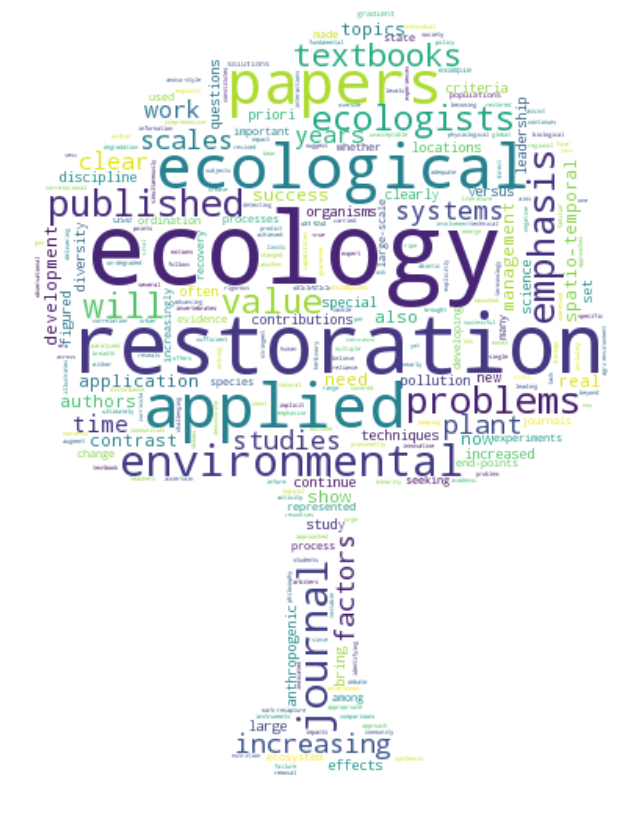

In [14]:
# Provide a mask
clip_mask = imread("static/img/tree.png")

# Create wordcloud
wc = WordCloud(background_color="white", width=800, height=800, mask=clip_mask, max_words = 400, stopwords=STOPWORDS) 
wc.generate_from_frequencies(oj)

# Plot
plt.figure(figsize = (16,14))
plt.imshow(wc)
plt.axis("off")
plt.show

# Output to file
#wc.to_file("tree.png") 